In [1]:
using PyPlot; using Revise; using MDToolbox;
PyPlot.plt[:style][:use]("seaborn-colorblind");
ENV["COLUMNS"] = 110; #display width for MDToolbox

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[1]:2
└ @ Core In[1]:2
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[1]:2
└ @ Core In[1]:2


In [2]:
ta = readnetcdf("data/md_alad/3_prod/run.nc")

25000x22 TrjArray
|    25.34    26.27     7.20 |    26.40    26.06     7.38 |  …      27.66    24.28     1.80 |
|    24.75    24.72     8.90 |    25.58    25.42     8.84 |         28.27    22.61     4.44 |
|    24.47    22.00     5.86 |    25.17    22.73     6.27 |         29.75    23.57     1.87 |
|    23.57    26.11     6.03 |    24.51    25.66     5.71 |         29.66    22.81     2.70 |
|    26.32    23.52     7.24 |    26.54    24.44     6.70 |         29.91    22.20     1.51 |
|    24.21    22.59     6.21 |    25.26    22.75     5.96 |  …      28.10    21.81     0.10 |
|    26.95    24.89     6.85 |    26.18    24.24     6.45 |         26.81    21.15     1.42 |
|    27.36    23.49     6.32 |    26.93    22.64     5.78 |         27.24    23.90    -0.74 |
|    27.12    19.64     3.78 |    27.86    20.26     4.27 |         23.79    21.29     0.84 |
|    29.50    19.76     5.16 |    28.64    19.65     5.82 |         26.38    21.90     0.19 |
|    28.54    19.49     6.72 |    28.40   

In [3]:
phi = getdihedral(ta[:, 5], ta[:, 7], ta[:, 9], ta[:, 15]);
psi = getdihedral(ta[:, 7], ta[:, 9], ta[:, 15], ta[:, 17]);

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[4]:2
└ @ Core In[4]:2
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[4]:5
└ @ Core In[4]:5
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[4]:8
└ @ Core In[4]:8
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[4]:8
└ @ Core In[4]:8


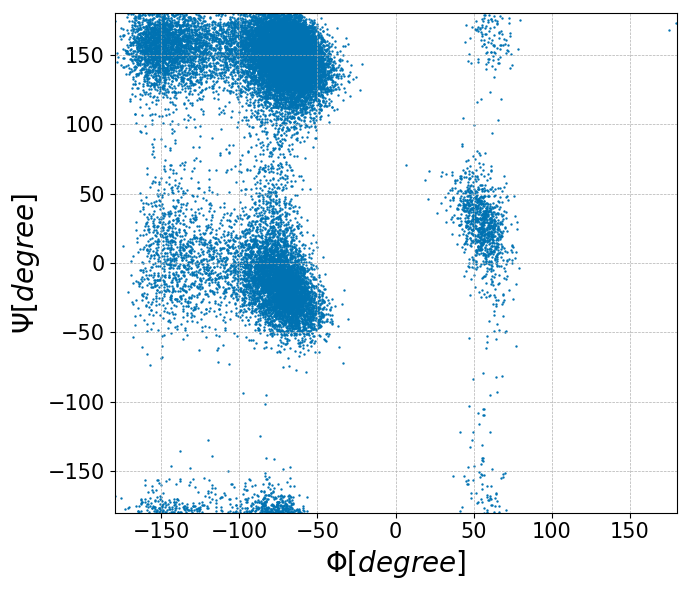

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[4]:9
└ @ Core In[4]:9
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[4]:9
└ @ Core In[4]:9
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[4]:10
└ @ Core In[4]:10


In [4]:
fig, ax = subplots(figsize=(7, 6));
ax[:scatter](phi, psi, s=0.5);
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (not necessary, just for reference)
ax[:set](xlim=[-180, 180], ylim=[-180, 180]);
ax[:xaxis][:set_tick_params](which="major",labelsize=15);
ax[:yaxis][:set_tick_params](which="major",labelsize=15);
ax[:grid](linestyle="--", linewidth=0.5);
tight_layout();

savefig("free_energy_surface1.png", dpi=350);

In [5]:
grid_x = -180:1:180;
grid_y = -180:1:180;
pmf, grid_x, grid_y = getpmf(phi, psi, grid_x=grid_x, grid_y=grid_y, bandwidth=[2.0, 2.0], boxsize=[360.0, 360.0]);
#KBT = 300.0 * KB_KCALPERMOL
KBT = KB_kcalpermol*300.0;
pmf = KBT .* pmf;

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[6]:5
└ @ Core In[6]:5
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[6]:6
└ @ Core In[6]:6
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = top-level scope at In[6]:7
└ @ Core In[6]:7
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[6]:8
└ @ Core In[6]:8
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s

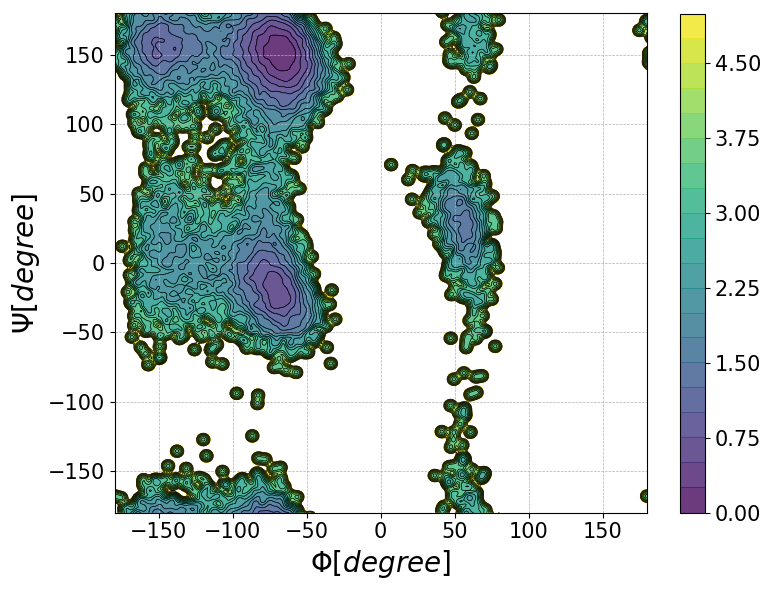

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[6]:14
└ @ Core In[6]:14
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[6]:15
└ @ Core In[6]:15


In [6]:
fig, ax = subplots(figsize=(8, 6));
meshgrid(x, y) = (repeat(x', length(y), 1), repeat(y, 1, length(x)));
X, Y = meshgrid(grid_x, grid_y);
levels = 0:0.25:5;
ax[:contour](X, Y, pmf, levels, colors="black", alpha=1.0, linewidths=0.5);
pos = ax[:contourf](X, Y, pmf, levels, alpha=0.8, cmap=get_cmap("viridis")) # colormaps: viridis, plasma, inferno, magma, jet, hsv, terrain
cbar = fig[:colorbar](pos, ax=ax);
cbar[:ax][:tick_params](labelsize=15);
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (not necessary, just for reference)
ax[:set](xlim=[-180, 180], ylim=[-180, 180]);
ax[:tick_params](axis="both", which="major",labelsize=15);
ax[:grid](linestyle="--", linewidth=0.5);
tight_layout();

savefig("free_energy_surface2.png", dpi=350, bbox_inches="tight");